<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/previs%C3%A3o_de_pre%C3%A7o_automoveis_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [221]:
df = pd.read_csv("/content/C├│pia de CarPrice_Assignment.csv")

In [222]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [223]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [224]:
df.rename(columns={
    "car_ID": "carro_ID",
    "symboling": "simbolizando",
    "CarName": "Nome_do_carro",
    "fueltype": "tipo_de_combustível",
    "aspiration": "aspiração",
    "doornumber": "número_da_porta",
    "carbody": "carroceria",
    "drivewheel": "volante",
    "enginelocation": "localização_do_motor",
    "wheelbase": "distância_entre_eixos",
    "carlength": "comprimento_do_carro",
    "carwidth": "largura_do_carro",
    "carheight": "altura_do_carro",
    "curbweight": "meio_fio",
    "enginetype": "tipo_de_motor",
    "cylindernumber": "número_do_cilindro",
    "enginesize": "tamanho_do_motor",
    "fuelsystem": "Sistema_de_combustível",
    "boreratio": "boreração",
    "stroke": "bateria",
    "compressionratio": "taxa_de_compressão",
    "horsepower": "cavalos_de_potência",
    "peakrpm": "rpm_de_pico",
    "citympg": "cidade_mpg",
    "highwaympg": "rodovia_mpg",
    "price": "preço"
}, inplace=True)


In [225]:
df.head()

,carro_ID,simbolizando,Nome_do_carro,tipo_de_combustível,aspiração,número_da_porta,carroceria,volante,localização_do_motor,distância_entre_eixos,...,tamanho_do_motor,Sistema_de_combustível,boreração,bateria,taxa_de_compressão,cavalos_de_potência,rpm_de_pico,cidade_mpg,rodovia_mpg,preço
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [226]:
le = LabelEncoder()


le.fit(df.Nome_do_carro)
df.Nome_do_carro = le.transform(df.Nome_do_carro)

le.fit(df.tipo_de_combustível)
df.tipo_de_combustível = le.transform(df.tipo_de_combustível)

le.fit(df.aspiração)
df.aspiração = le.transform(df.aspiração)

le.fit(df.número_da_porta)
df.número_da_porta = le.transform(df.número_da_porta)

le.fit(df.carroceria)
df.carroceria = le.transform(df.carroceria)

le.fit(df.volante)
df.volante = le.transform(df.volante)

le.fit(df.localização_do_motor)
df.localização_do_motor = le.transform(df.localização_do_motor)

le.fit(df.tipo_de_motor)
df.tipo_de_motor = le.transform(df.tipo_de_motor)

le.fit(df.número_do_cilindro)
df.número_do_cilindro = le.transform(df.número_do_cilindro)

le.fit(df.Sistema_de_combustível)
df.Sistema_de_combustível = le.transform(df.Sistema_de_combustível)



In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carro_ID                205 non-null    int64  
 1   simbolizando            205 non-null    int64  
 2   Nome_do_carro           205 non-null    int64  
 3   tipo_de_combustível     205 non-null    int64  
 4   aspiração               205 non-null    int64  
 5   número_da_porta         205 non-null    int64  
 6   carroceria              205 non-null    int64  
 7   volante                 205 non-null    int64  
 8   localização_do_motor    205 non-null    int64  
 9   distância_entre_eixos   205 non-null    float64
 10  comprimento_do_carro    205 non-null    float64
 11  largura_do_carro        205 non-null    float64
 12  altura_do_carro         205 non-null    float64
 13  meio_fio                205 non-null    int64  
 14  tipo_de_motor           205 non-null    in

In [228]:
df.columns


Index(['carro_ID', 'simbolizando', 'Nome_do_carro', 'tipo_de_combustível',
       'aspiração', 'número_da_porta', 'carroceria', 'volante',
       'localização_do_motor', 'distância_entre_eixos', 'comprimento_do_carro',
       'largura_do_carro', 'altura_do_carro', 'meio_fio', 'tipo_de_motor',
       'número_do_cilindro', 'tamanho_do_motor', 'Sistema_de_combustível',
       'boreração', 'bateria', 'taxa_de_compressão', 'cavalos_de_potência',
       'rpm_de_pico', 'cidade_mpg', 'rodovia_mpg', 'preço'],
      dtype='object')

In [229]:
df.corr()

,carro_ID,simbolizando,Nome_do_carro,tipo_de_combustível,aspiração,número_da_porta,carroceria,volante,localização_do_motor,distância_entre_eixos,...,tamanho_do_motor,Sistema_de_combustível,boreração,bateria,taxa_de_compressão,cavalos_de_potência,rpm_de_pico,cidade_mpg,rodovia_mpg,preço
carro_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
simbolizando,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
Nome_do_carro,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
tipo_de_combustível,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiração,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
número_da_porta,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carroceria,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
volante,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
localização_do_motor,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
distância_entre_eixos,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


In [230]:
df.describe()

,carro_ID,simbolizando,Nome_do_carro,tipo_de_combustível,aspiração,número_da_porta,carroceria,volante,localização_do_motor,distância_entre_eixos,...,tamanho_do_motor,Sistema_de_combustível,boreração,bateria,taxa_de_compressão,cavalos_de_potência,rpm_de_pico,cidade_mpg,rodovia_mpg,preço
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [231]:
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df),index = df.index, columns = df.columns)

In [232]:
df_norm.describe()

,carro_ID,simbolizando,Nome_do_carro,tipo_de_combustível,aspiração,número_da_porta,carroceria,volante,localização_do_motor,distância_entre_eixos,...,tamanho_do_motor,Sistema_de_combustível,boreração,bateria,taxa_de_compressão,cavalos_de_potência,rpm_de_pico,cidade_mpg,rodovia_mpg,preço
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

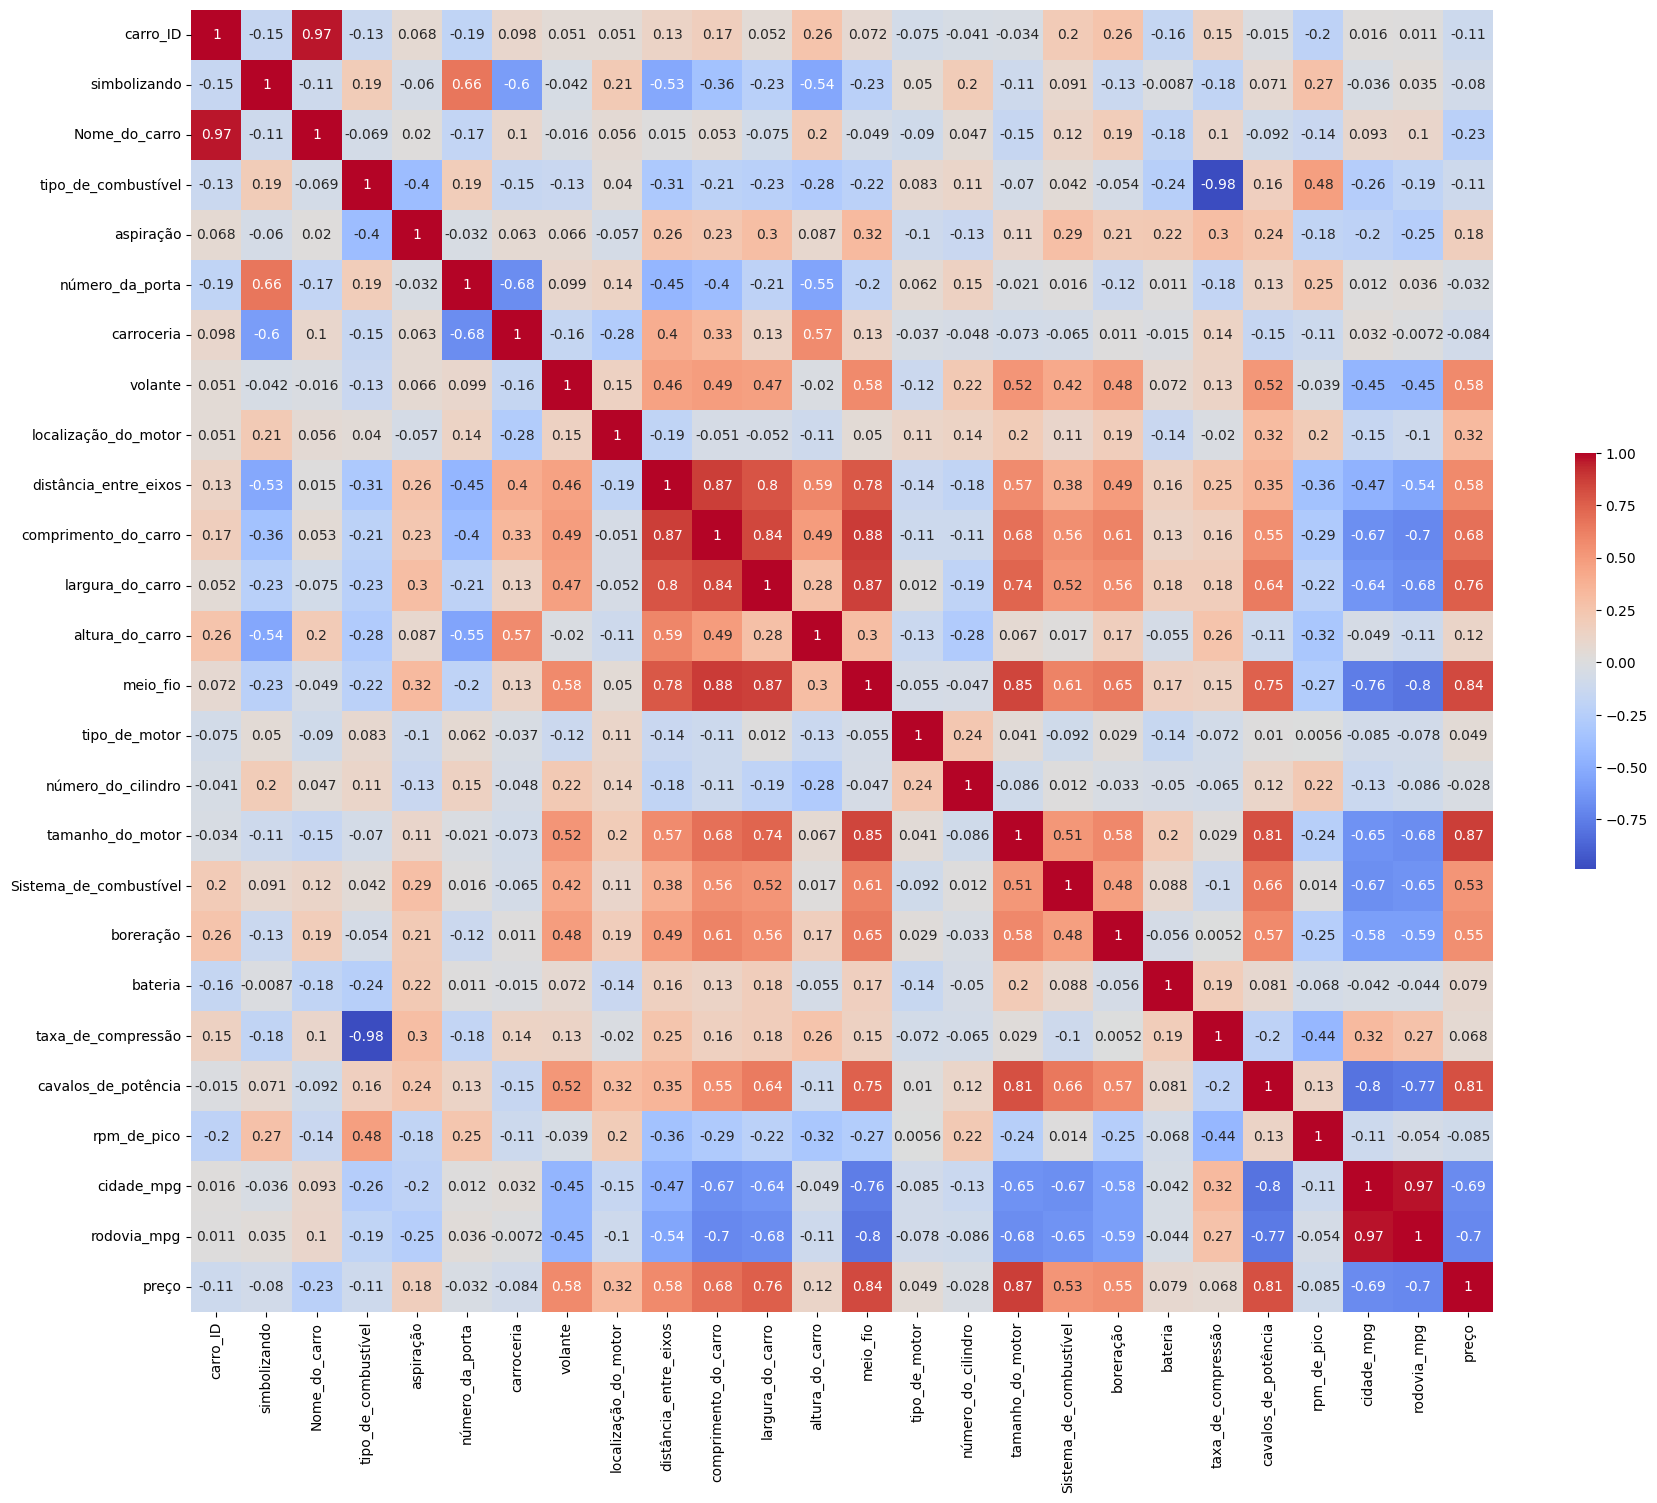

In [233]:
plt.figure(figsize=(21, 18))
sns.heatmap(df_norm.corr(), annot=True, square=True, cmap='coolwarm', cbar_kws={"shrink": .3})

In [234]:
sns.heatmap?


In [235]:
function = "preço ~ Nome_do_carro +  número_da_porta + carroceria + volante + localização_do_motor + largura_do_carro + altura_do_carro + meio_fio  + tamanho_do_motor +  bateria  + cavalos_de_potência + rpm_de_pico -1"


In [236]:
model = smf.ols(formula = function, data = df_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preço   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              286.6
Date:                Mon, 01 Jul 2024   Prob (F-statistic):                   6.26e-116
Time:                        19:48:33   Log-Likelihood:                          268.61
No. Observations:                 205   AIC:                                     -513.2
Df Residuals:                     193   BIC:                                     -473.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [237]:
x = df_norm[["Nome_do_carro","número_da_porta", "carroceria" ,"volante" ,"localização_do_motor","largura_do_carro","altura_do_carro", "meio_fio","tamanho_do_motor" ,"bateria","cavalos_de_potência","rpm_de_pico"]]
y = df_norm["preço"]

In [238]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [239]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8876774915961305


In [240]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.04524421766930707
MSE: 0.0033833307471561333
RMSE: 0.05816640565787208


In [241]:

y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0637188113961827
MSE: 0.008448304372121348
RMSE: 0.09191465809173936


Text(0.5, 1.0, 'Regressão Linear')

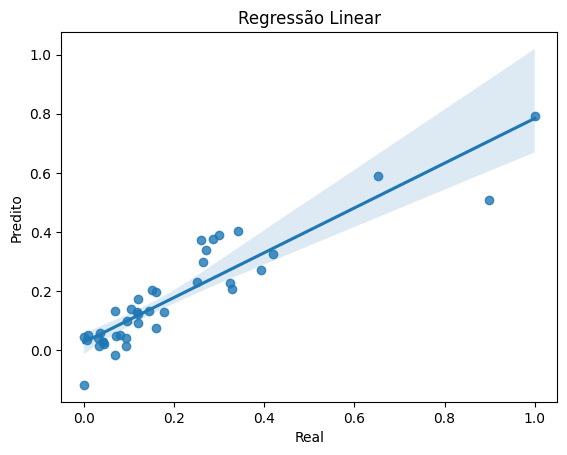

In [242]:
sns.regplot(x=y_test, y=y_pred,scatter = True);
plt.xlabel("Real")
plt.ylabel("Predito")
plt.title("Regressão Linear")

In [243]:
sns.regplot?